In [3]:
#load packages
import numpy as np
import sklearn.model_selection
import matplotlib.pyplot as plt


In [4]:
#make helper functions

def plot_digit(X, y, idx):
    img = X[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title('true label: %d' % y[idx])
    plt.show()


In [6]:
#load data

from mlxtend.data import mnist_data
X, y = mnist_data()


#we just focus on 1's and 0's:
keep=(y==0) | (y==1)
X=X[keep,:]
y=y[keep]

y=np.expand_dims(y,1)

C:\Users\Jens\AppData\Local\Temp\ipykernel_14800\1119189001.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('true label: %d' % y[idx])


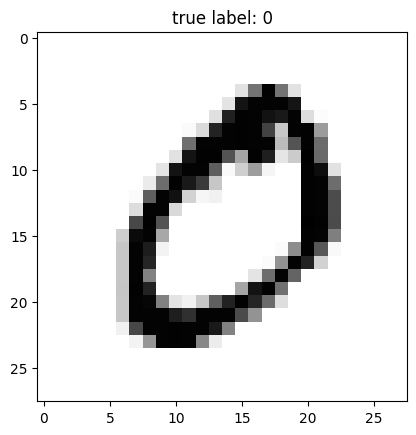

In [16]:
#inspect data
#(plot digit)

plot_digit(X, y, 0)


In [17]:
# create a loss function:
def avrLoss(y,a):
  #INSERT CODE
  loss = -(y*np.log(a)+(1-y)*np.log(1-a))
  return np.mean(loss)

In [18]:
#test loss function:
#(just run this cell and see what happens)


loss=avrLoss(np.array([0,1,0,1]),np.linspace(.1,.9,4))
assert np.all(loss==0.5543313122608056)

In [19]:
#create a sigmoid
def sigmoid(z):
  #INSERT CODE
  return 1/(1+np.exp(-z))

In [20]:
#check sigmoid
#(just run this cell and see what happens)

out=sigmoid(np.array(range(-5,5)))
assert np.all(np.around(out,8)==np.array([0.00669285, 0.01798621, 0.04742587, 0.11920292, 0.26894142, 0.5, 0.73105858, 0.88079708, 0.95257413, 0.98201379]))

In [25]:
#make test & train data

Xtrain,Xtest,ytrain,ytest=sklearn.model_selection.train_test_split(X,y,test_size=0.3,shuffle=True)
print(Xtrain.shape)

(700, 784)


In [41]:
#train

#INITIATE WEIGHTS AND BIASES (w,b)
w=np.random.randn(Xtrain.shape[1],1)
b=np.random.randn(1,1) #we make it (1,1) to make it a scalar and not just an integer. This is so we can add it to a vector later

nEpoch=1000

accuracy=np.zeros(nEpoch)
trainRate=0.01

for iTrain in range(nEpoch):
  #evaluate
  #CALCULATE a
  a=sigmoid(np.matmul(Xtrain,w)+b)

  #calculate loss & accuracy
  #Look at loss, do we return the avg. loss for each value of ytrain and a?
  loss=avrLoss(ytrain,a)
  yhat=a>.5
  accuracy[iTrain]=np.mean(yhat==ytrain)


  #update weights
  wgrad=np.matmul(Xtrain.T,a-ytrain)/len(ytrain)
  bgrad=np.mean(a-ytrain)

  assert(wgrad.shape == w.shape)

  #UPDATE W AND b
  w = w - trainRate*wgrad
  b = b - trainRate*bgrad

  if np.mod(iTrain,10)==0:
    print(iTrain,loss,accuracy[iTrain])

Y_prediction_test = sigmoid(np.matmul(Xtest,w)+b)>0.5
Y_prediction_train = sigmoid(np.matmul(Xtrain,w)+b)>0.5

print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - ytrain)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - ytest)) * 100))

C:\Users\Jens\AppData\Local\Temp\ipykernel_14800\1653162143.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))
C:\Users\Jens\AppData\Local\Temp\ipykernel_14800\1236723548.py:4: RuntimeWarning: divide by zero encountered in log
  loss = -(y*np.log(a)+(1-y)*np.log(1-a))
C:\Users\Jens\AppData\Local\Temp\ipykernel_14800\1236723548.py:4: RuntimeWarning: invalid value encountered in multiply
  loss = -(y*np.log(a)+(1-y)*np.log(1-a))


0 nan 0.5442857142857143
10 nan 0.9914285714285714
20 nan 0.9942857142857143
30 nan 0.9971428571428571
40 nan 0.9971428571428571
50 nan 0.9971428571428571
60 nan 0.9985714285714286
70 nan 1.0
80 nan 1.0
90 nan 1.0
100 nan 1.0
110 nan 1.0
120 nan 1.0
130 nan 1.0
140 nan 1.0
150 nan 1.0
160 nan 1.0
170 nan 1.0
180 nan 1.0
190 nan 1.0
200 nan 1.0
210 nan 1.0
220 nan 1.0
230 nan 1.0
240 nan 1.0
250 nan 1.0
260 nan 1.0
270 nan 1.0
280 nan 1.0
290 nan 1.0
300 nan 1.0
310 nan 1.0
320 nan 1.0
330 nan 1.0
340 nan 1.0
350 nan 1.0
360 nan 1.0
370 nan 1.0
380 nan 1.0
390 nan 1.0
400 nan 1.0
410 nan 1.0
420 nan 1.0
430 nan 1.0
440 nan 1.0
450 nan 1.0
460 nan 1.0
470 nan 1.0
480 nan 1.0
490 nan 1.0
500 nan 1.0
510 nan 1.0
520 nan 1.0
530 nan 1.0
540 nan 1.0
550 nan 1.0
560 nan 1.0
570 nan 1.0
580 nan 1.0
590 nan 1.0
600 nan 1.0
610 nan 1.0
620 nan 1.0
630 nan 1.0
640 nan 1.0
650 nan 1.0
660 nan 1.0
670 nan 1.0
680 nan 1.0
690 nan 1.0
700 nan 1.0
710 nan 1.0
720 nan 1.0
730 nan 1.0
740 nan 1.0
750 na

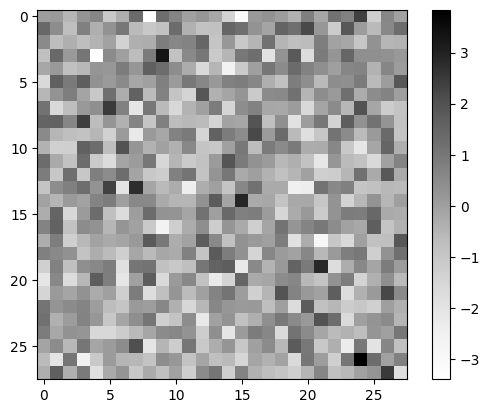

In [42]:
#see what the network does:
img = w.reshape(28,28)
h=plt.imshow(img, cmap='Greys',  interpolation='nearest')
plt.colorbar(h)
plt.show()

Train accuracy:  1.0
Test accuracy:  1.0


c:\Users\Jens\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


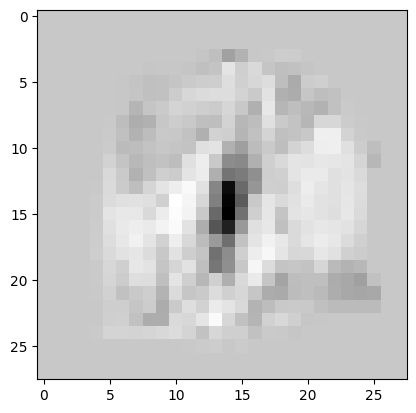

In [43]:
#commpare with scikit-learn:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(Xtrain, ytrain)

clf.predict(X)
print('Train accuracy: ',clf.score(Xtrain, ytrain))
print('Test accuracy: ',clf.score(Xtest, ytest))

img = (clf.coef_).reshape(28,28)
plt.imshow(img, cmap='Greys',  interpolation='nearest')
plt.show()